In [ ]:
import pandas as pd

import requests
headers = {
    'api-auth': "your uuid"
}
response = requests.get('https://adsbexchange.com/api/aircraft/icao/123abc/'
, headers = headers)
data = response.text



In [1]:
import pandas as pd

import requests
headers = {
    'api-auth': "your uuid"
}
response = requests.get('https://api.open-meteo.com/v1/forecast?latitude=52.52&longitude=13.41&hourly=temperature_2m&models=knmi_seamless'
, headers = headers)
data = response.text

In [2]:
print(data)

{"latitude":52.52333,"longitude":13.439041,"generationtime_ms":0.030875205993652344,"utc_offset_seconds":0,"timezone":"GMT","timezone_abbreviation":"GMT","elevation":38.0,"hourly_units":{"time":"iso8601","temperature_2m":"°C"},"hourly":{"time":["2025-09-17T00:00","2025-09-17T01:00","2025-09-17T02:00","2025-09-17T03:00","2025-09-17T04:00","2025-09-17T05:00","2025-09-17T06:00","2025-09-17T07:00","2025-09-17T08:00","2025-09-17T09:00","2025-09-17T10:00","2025-09-17T11:00","2025-09-17T12:00","2025-09-17T13:00","2025-09-17T14:00","2025-09-17T15:00","2025-09-17T16:00","2025-09-17T17:00","2025-09-17T18:00","2025-09-17T19:00","2025-09-17T20:00","2025-09-17T21:00","2025-09-17T22:00","2025-09-17T23:00","2025-09-18T00:00","2025-09-18T01:00","2025-09-18T02:00","2025-09-18T03:00","2025-09-18T04:00","2025-09-18T05:00","2025-09-18T06:00","2025-09-18T07:00","2025-09-18T08:00","2025-09-18T09:00","2025-09-18T10:00","2025-09-18T11:00","2025-09-18T12:00","2025-09-18T13:00","2025-09-18T14:00","2025-09-18T15

In [3]:
pip install requests pandas



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
import requests
import pandas as pd

# USGS API endpoint (aardbevingen afgelopen dag)
url = "https://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/all_day.geojson"

# Fetch data
response = requests.get(url, timeout=15)
data = response.json()

# 'features' bevat alle aardbevingen
earthquakes = data.get("features", [])

# Bouw een lijst van dicts met relevante info
records = []
for eq in earthquakes:
    props = eq.get("properties", {})
    geom = eq.get("geometry", {})
    coords = geom.get("coordinates", [None, None, None])  # lon, lat, depth
    
    record = {
        "place": props.get("place"),
        "mag": props.get("mag"),
        "time": pd.to_datetime(props.get("time"), unit="ms"),
        "updated": pd.to_datetime(props.get("updated"), unit="ms"),
        "longitude": coords[0],
        "latitude": coords[1],
        "depth_km": coords[2],
        "url": props.get("url"),
    }
    records.append(record)

# Zet om naar pandas DataFrame
df = pd.DataFrame(records)

# Sorteer bijvoorbeeld op magnitude
df_clean = df.sort_values(by="mag", ascending=False)
             
# Bekijk de eerste rijen
print(df_clean)             

                                     place   mag                    time  \
184  206 km SE of Kokopo, Papua New Guinea  6.00 2025-09-16 16:59:51.491   
16           82 km WNW of Isangel, Vanuatu  5.10 2025-09-17 12:02:38.796   
10               104 km SW of Kurio, Japan  4.90 2025-09-17 12:55:03.382   
189      64 km SW of Puerto Madero, Mexico  4.90 2025-09-16 16:11:25.436   
59       204 km SSE of Vilyuchinsk, Russia  4.80 2025-09-17 06:38:55.549   
..                                     ...   ...                     ...   
96     37 km WNW of Indian Springs, Nevada -0.30 2025-09-17 03:08:29.209   
134            47 km ESE of Beatty, Nevada -0.40 2025-09-16 23:04:09.804   
211            86 km NNW of Karluk, Alaska -0.42 2025-09-16 14:06:50.310   
60     40 km WNW of Indian Springs, Nevada -0.50 2025-09-17 06:35:54.682   
176            47 km ESE of Beatty, Nevada -0.50 2025-09-16 17:52:11.633   

                    updated   longitude  latitude  depth_km  \
184 2025-09-16 21:37:07.

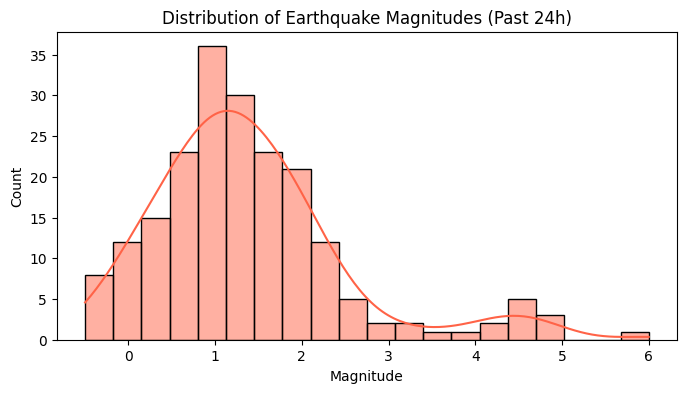

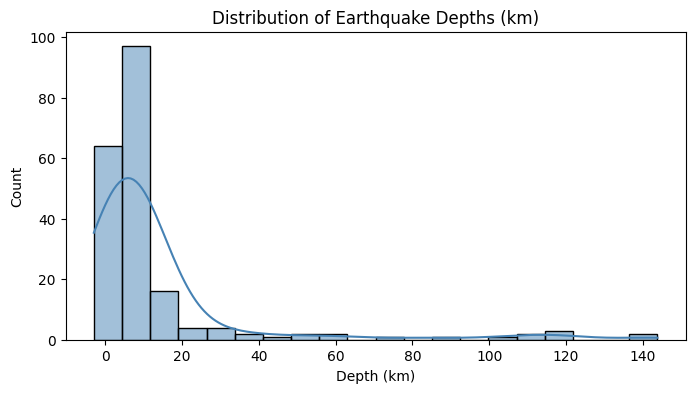

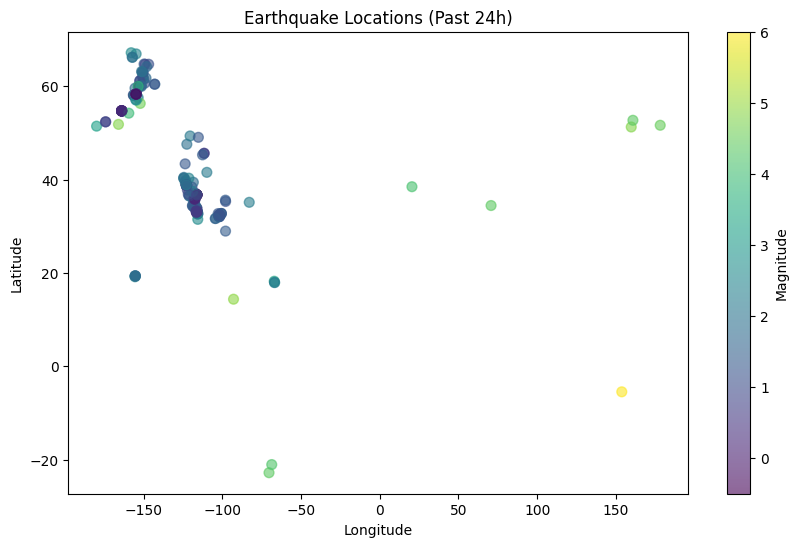

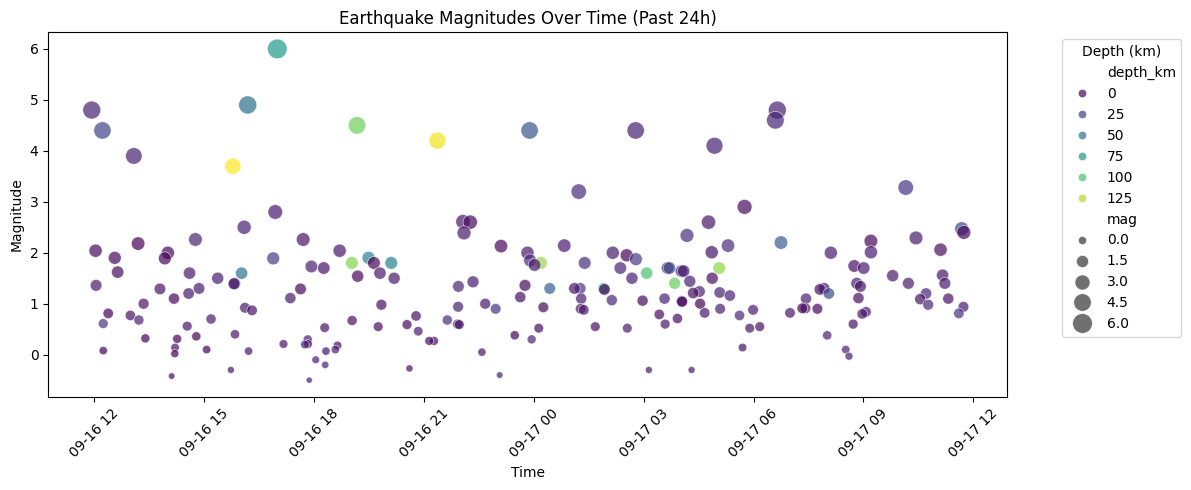

In [5]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Fetch USGS earthquake data
url = "https://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/all_day.geojson"
response = requests.get(url)
data = response.json()

# Extract relevant info
earthquakes = data.get("features", [])
records = []
for eq in earthquakes:
    props = eq.get("properties", {})
    geom = eq.get("geometry", {})
    coords = geom.get("coordinates", [None, None, None])  # lon, lat, depth
    records.append({
        "place": props.get("place"),
        "mag": props.get("mag"),
        "longitude": coords[0],
        "latitude": coords[1],
        "depth_km": coords[2],
    })

df = pd.DataFrame(records)

# --- Visual 1: Distribution of magnitudes ---
plt.figure(figsize=(8,4))
sns.histplot(df['mag'].dropna(), bins=20, kde=True, color='tomato')
plt.title("Distribution of Earthquake Magnitudes (Past 24h)")
plt.xlabel("Magnitude")
plt.ylabel("Count")
plt.show()

# --- Visual 2: Distribution of depths ---
plt.figure(figsize=(8,4))
sns.histplot(df['depth_km'].dropna(), bins=20, kde=True, color='steelblue')
plt.title("Distribution of Earthquake Depths (km)")
plt.xlabel("Depth (km)")
plt.ylabel("Count")
plt.show()

# --- Visual 3: Scatter map of earthquake locations ---
plt.figure(figsize=(10,6))
plt.scatter(df['longitude'], df['latitude'], c=df['mag'], cmap='viridis', s=50, alpha=0.6)
plt.colorbar(label='Magnitude')
plt.title("Earthquake Locations (Past 24h)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

# --- Time-based scatter plot: magnitude over time ---
plt.figure(figsize=(12,5))
sns.scatterplot(
    data=df_clean, 
    x='time', 
    y='mag', 
    hue='depth_km', 
    palette='viridis', 
    size='mag', 
    sizes=(20,200), 
    alpha=0.7
)
plt.title("Earthquake Magnitudes Over Time (Past 24h)")
plt.xlabel("Time")
plt.ylabel("Magnitude")
plt.legend(title="Depth (km)", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()